<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.40-Neural-Computation/blob/main/PSET%206/pset6_TemplateSP23_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSET 6

April 15

# Due April 29, 2023 (Saturday)





---



---



---



# NAME:

#gmail: 




---



---



---



# Learning objectives and goals:

In the first half of this problem set, we will build a perceptron neural network that performs binary classification. We will derive the weight vector for the perceptron in two ways: via analytical work, and by performing numerical simulations in Python that implement the perceptron learning and weights update rule.

.


In the second half of this problem, we will use Principal Component Analysis to reduce dimensionality of a relatively large neuronal data set. We will use this dimensionality reduction to generate meaningful visualization of the data set, and also to build a crude and rudimentary decoder for neuronal activity.

.


The topics of this PSET are covered in lectures 13-15.

.


These two problems are a great way to put all the linear algebra we have learned so far to work. They are also helpful in emphasizing the two roles that matrices play: to represent and to transform data. By the end of this PSET, you should be familiar with:



*   Dot products, unit vectors, matrix multiplication and change of basis.
*   Performing linear transformations such as rotations and scaling.
*   Implementing the perceptron algorithm in Python.
*   Perform mean subtraction, construct covariance matrices and compute eigenvectors and eigenvalues in Python.
*   Use Principal Component Analysis to find the directions of maximum variance of a given dataset.
*   Use Principal Component Analysis to perform a change of basis and generate novel data visualizations.








**New Python Functions**



*   $numpy.matlib.repmat$ :  Replicate and tile array (repeat copies of an array)
*   $numpy.linalg.eig$  :    Compute the eigenvectors and eigenvalues of a matrix




---





In [ ]:
import numpy as np
import numpy.matlib as npm                   # needed for repmat()
import matplotlib.pyplot as plt
import random
import copy



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "Colab Notebooks/bcs940/..........."

# check if your project folder exists. if not, it will be created.
#if os.path.isdir(root_dir + project_folder) == False:
#  os.mkdir(root_dir + project_folder)
#  print(root_dir + project_folder + ' did not exist but was created.')

# change the OS to use your project folder as the working directory
os.chdir(root_dir + project_folder)

Mounted at /content/drive


FileNotFoundError: ignored

# PROBLEM 1: Neural Networks and Linear Algebra

We will use this exercise to start gaining insight on how feed-forward neural networks transform input data. In class, we discussed modeling a network of neurons where each input neuron has a firing rate and specified synaptic weights onto a set of output neurons. Such a network can perform matrix multiplications. To get us warmed up we will start with a simple question.



## 1.1

Construct a feed-forward neural network with 2 input neurons and 2 output neurons that performs a 60 degrees counter-clockwise rotation in 2D space. Sketch this network and write the weight matrix.



$$W = \begin{bmatrix}
W_{11} & W_{12} \\
W_{21} & W_{22}
\end{bmatrix}$$






**ANSWER**



.



.










[paste your graph here]

# PROBLEM 2: The Perceptron Learning Algorithm


In this exercise, you will build neural networks that do not transform their inputs, but that are capable of performing binary classification. To illustrate the principle behind the perceptron learning algorithm, you will construct a neural network that classifies stimuli into two categories. The perceptron receives two inputs, which represent two stimulus features. The stimuli are plotted below in this 2D feature-space, colored according to their category. Your perceptron should fire for stimuli in the blue category and not for stimuli in the red category with $\theta = 1$.





In [ ]:
# generate two Gaussian blobs

rsv = np.random.RandomState(940000)  # fix random seed

x1 = rsv.multivariate_normal([0,0],[[1,0],[0,1]], size = 1000).T  # centered at (0,0)
x2 = rsv.multivariate_normal([5,4],[[1,0],[0,1]], size = 1000).T   # centered at (5,4)

fig, ax =plt.subplots()
ax.scatter(x1[0],x1[1],  marker = 'o', facecolors='none', edgecolors='r')
ax.scatter(x2[0],x2[1],  marker='o',facecolors='none', edgecolors='b')
ax.set_ylim(-4, 12)
ax.set_xlim(-4,10)
plt.grid()
ax.set_aspect('equal')


# QUESTION 2.1
# set a boundary  (approximate)
# write the equation for the boundary and plot it

# add your code here

# plot weight vector from your boundary equation

# add your code here


##2.1

On the above plot, draw a decision boundary and a weight vector that would distinguish the two categories.

<br>

Use the code provided above

**ANSWER**



---




---




## 2.2

Draw a diagram of your perceptron and its inputs. Find the weights and label your diagram accordingly. Use standard binary threshold units as described in class, with outputs 0 or 1 and a threshold θ=1.



**ANSWER**




---


.

---



Figure. Perceptron that fires for blue blobs

[paste figure here]

## 2.3

In this case, you were able to compute the weights by hand. But in higher dimensions, with more complicated inputs, that can be impossible. We will now implement the perceptron-learning algorithm, which automatically determines the weights by starting from a random guess and updating that guess whenever it makes an error.



*   The code provided below implements the perceptron-learning algorithm for the example above. The blue category has label 1 and the red category has label 0. The main for-loop is incomplete. Your job is to complete it, with help from the comments in the code.


*   Pay attention to the learning rate parameter $eta$. Try different values between 0.001 and 0.01, and choose the best that converges to the best result.


*   Once completed, the file should plot the original points and the final decision boundary.





In [ ]:
N1 = 1000                                 # num samples set 1
N2 = 1000                                 # num samples set 2 
N = N1 + N2

In [ ]:
# label the data set
T1 = np.zeros(N1)
T2 = np.ones(N2)

T = np.hstack((T1,T2))      # true values 1 (orange),   0
x = np.hstack((x1,x2))


fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(x1[0], x1[1])
ax1.scatter(x2[0], x2[1])

np.random.seed(42)             # do not change the seed
j = np.random.permutation(np.arange(0,N,1))
T = T[j]                                  # shuffle data for streaming
x = x[:,j]

theta = 1                                 # threshold
eta = 0.01                                # learning rate  NEED TO FIND BEST VALUE


# initialize weight vector

w = np.array([1,1]) 


for idx in range(N):
    # follow instructions to complete for-loop. You'll be implementing (w.x -theta) 
      
    # project the ith data point onto w and compute the output of the
    # perceptron: wx - theta
    output = '.....................'


    # compute the update (delta w) to the weight vector under these two
    # conditions:
    # if the classification was correct: do nothing
    # if the classification was incorrect: shift w 
    
    # FIND update

    # add your code here for update
    
    w = w + update

print('Weight Vector = ', w)


# Your code to add  the decision boundary to figure (1) goes here
# draw boundary in green

..............


ax1.plot(X,Y, c='g')
ax1.grid()








## 2.4

How do the automatically determined weights compare to the weights you derived by hand?

.



**ANSWER**



In [ ]:
print("w = ",w)

# PROBLEM 3: Combining Multiple Perceptrons


The following figure illustrates a binary classification problem that cannot be solved with a single perceptron.



In [ ]:
yL = np.random.rand(100)
xL1 = -1 - 3*np. random.rand(50) 
xL2 = 2 +  4*np. random.rand(50) 
xM =  3*np.random.rand(100) -1


fig, ax = plt.subplots()
ax.scatter(xL1, yL[0:50], c='b')
ax.scatter(xL2, yL[50:], c ='b')
ax.scatter(xM, yL, c ='r')
ax.set_xticks(np.arange(-4,6)),
ax.grid()

## 3.1

Why is this problem not solvable by a single perceptron?


**ANSWER**

There is no way to draw a single line to divide the blue dots from the red dots.


## 3.2

Find, draw, and label properly a multilayer perceptron that correctly classifies the blue dots and the red dots. Use binary threshold units as described in class, with outputs 0 or 1 and a threshold θ=1. Make the neurons fire if blue.

.




**ANSWERS**



.




In [ ]:
# drawing boundaries and add them to the graph given above (use display (fig))

# add code here

display(fig)

[paste your network here]


.





---



---



# PROBLEM 4: Reducing Dimensionality of Motor Cortex Activity During a Reaching Task


In this problem, we will use PCA to visualize the activity of a large population of neurons recorded in macaque motor cortex during a center-out reaching task. Based on the results of the PCA, we will design an algorithm that could control a simple prosthetic arm to move according to the monkey’s motor cortex commands. The data were collected in Nicho Hatsopolous’s lab at University of Chicago, and are contained in the file $ReachData.mat$.


.



The matrix R contains the firing rate of each of 143 neurons for a total of 158 trials. The vector direction specifies the reach direction for each of the 158 trials. Direction 1 corresponds to a rightward reach (0 degrees), direction 2 to 45 degrees, direction 3 to 90 degrees (straight up), etc, with direction 8 corresponding to 315 degrees. Think about the orientation of the matrix R before you proceed. If needed, transpose R to flip the rows and columns.

.

**HINT:**

your lecture notes and recitation has most of the code you'll need for this problem.

In [ ]:
from scipy.io import loadmat
import numpy.linalg as npl


Data = loadmat("ReachData.mat")
direction = Data["direction"]

X = Data["R"]               # contains firing rate of 143 neurons for a total of 158 trials

print(direction.shape)      # each trial has a direction in steps of 45 degress, 158 entries 


## 4.1

Center the data from each neuron by subtracting off the average firing rate of that neuron, using numpy.matlib.repmat. 

.

Why do we do this before performing PCA? 


<br>

Hint: think about, in 2D, what goes wrong if you perform PCA on a cloud of data that is not centered at 0. This is discussed in recitation and lecture notes.



In [ ]:
neuron = X.shape[0]                              # first element of shape is number of neurons, 143 
trials = X.shape[1]                              # second element is num trials, 158

mu = np.mean(X,axis=1)                           #  143 dim. horiz.  vector

# CENTER YOUR DATA, and place in array 'Z'


Z = 'X-mu'                           # substract from each measurement in each trial its corresponding mean. 




**ANSWER:**


.

## 4.2


Compute the covariance matrix that we will use to determine the principal neuronal components. What size is this matrix? What does the ij-th entry of this matrix represent?



**ANSWER**

.


In [ ]:
# Add covariance matrix here and call it 'Q'
Q = 'covariance matrix'

print(Q.shape)

## 4.3

Use the eig command from the **numpy.linalg** toolbox to compute the eigenvectors and eigenvalues of the covariance matrix. 

<br>

Order the eigenvalues in descending order.

<br>


What do the eigenvectors represent?



**ANSWER**


.




## 4.4

In two subplots, plot the eigenvalues in descending order, and the percentage of variance explained (numpy.cumsum may be helpful). How much variance is explained by the first two principal components?



**ANSWER**


.

In [ ]:
# CALCULATE AND PLOT VARIANCE EXPLAINED



# variance explained by first two principal components:
print("Variance explained : ")

## 4.5

We will now visualize the neuronal data in two dimensions to observe how the population of neurons in motor cortex fires differently when the monkey reaches in different directions. First, write Python code to plot two dimensions (e.g., Neurons 7 and 8) of the **mean-subtracted** data. 

Each point on your plot should represent a trial, with a different color for each reach direction. This will help you visualize how well the neuronal activity clusters according to reach direction. Later, you will use this code to plot the first two principal components of your data. Check that your plot of responses from neurons 7 and 8 matches the figure below (of course, your colors may be different - note a lack of clear clustering).

.



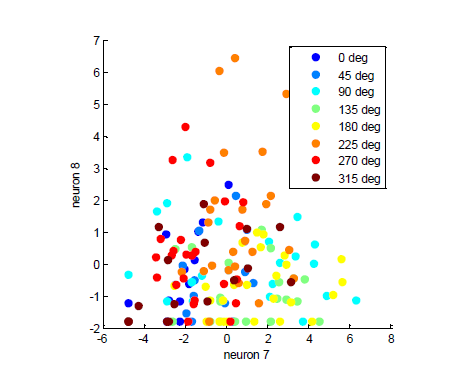

**ANSWER**


.

In [ ]:
# neuron 7 and neuron 8 data

fig5, ax5 = plt.subplots(figsize=(8,8))

print("direction.shape :",direction.shape)


# ADD YOUR CODE HERE



picture




## 4.6

Plot the first two principal components of your data. 

Each point should correspond to a different trial and should be colored according to the reach direction for that trial. What do you notice?



**ANSWER**


.

In [ ]:
# CODE FOR PROJECTING YOUR DATA ON PC1 and PC2



**ANSWER**

data are mostly clustered in two groups: 


.....

#PROBLEM 5: Principal Components to Decode Neuronal Activity


Now we will consider a simple way of decoding the neuronal activity in motor cortex to move an artificial hand. Suppose we have a simple robotic hand that we want the monkey to control. The simple hand has two motors: positive voltage to motor A makes the hand move right, and positive voltage to motor B makes the hand move up (negative voltage to either motor makes the hand move in the opposite direction as positive voltage does). For each motor, we assign each neuron a weight, which determines how much the voltage to that motor is influenced by the activity of that neuron. Specifically, $𝑉_𝐴 = \sum_i w_{Ai}\cdot r_i$, where $𝑉_𝐴$ is the voltage to motor $A$, $𝑤_{𝐴𝑖}$ is the weight from neuron $i$ to motor $A$, and $𝑟_𝑖$ is the mean-subtracted firing rate of neuron (See the diagram below).


.

Therefore motor A controls motion along the x-axis and motor B controls motion along the y-axis.

.




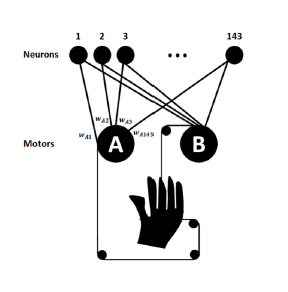

## 5.1

Suppose we connected each neuron to motor A with the weights specified by the first principal component. What would happen when the monkey tried to reach up (90 degrees reach direction)?



**ANSWER**


.


## 5.2

Suppose we also connected each neuron to motor B with the weights specified by the second component. What would happen now when the monkey tried to reach up?



**ANSWER**



.


## 5.3

What linear algebra technique could we use to correct the weights so that the artificial hand moves in the correct direction?



**ANSWER**


.

